# 3D-DAOSTORM 2D / 2D fixed analysis.
This notebook explains how to do 2D or 2D fixed analysis using 3D-DAOSTORM.
* In 2D fixed fitting we constrain the Gaussian fitting function with a fixed $\sigma$ value.
* In 2D fitting the Gaussian $\sigma$ can vary, but it is forced to be the same in X and Y.

### Configuring the directory
Create an empty directory somewhere on your computer and tell Python to go to that directory.

In [1]:
import os
os.chdir("/Users/ncc-1701-enterprise/Documents/MERFISH_analysis/Data/storm_analysis/jy_testing/")
print(os.getcwd())

/Users/ncc-1701-enterprise/Documents/MERFISH_analysis/Data/storm_analysis/jy_testing


In [2]:
import sys
sys.path.append('/Users/ncc-1701-enterprise/Documents/MERFISH_analysis/storm-analysis/') #添加当前路径进入PATH变量以实现模块加载

Generate sample data for analysis.

In [3]:
import storm_analysis.jupyter_examples.dao3d_2d as dao3d_2d
dao3d_2d.configure()

/Users/ncc-1701-enterprise/Documents/MERFISH_analysis/Data/storm_analysis/jy_testing
Creating parameters file.
Creating ground truth localizations.
Added 120
Creating movie.
Frame 0 120 emitters
Frame 1 120 emitters
Frame 2 120 emitters
Frame 3 120 emitters
Frame 4 120 emitters
Frame 5 120 emitters
Frame 6 120 emitters
Frame 7 120 emitters
Frame 8 120 emitters
Frame 9 120 emitters


### Working with analysis parameters.
In this example we'll only adjust `threshold` but other important parameters include `sigma`, `roi_size` and `find_max_radius`.

In [4]:
import storm_analysis.sa_library.parameters as params
daop = params.ParametersDAO().initFromFile("example.xml")

Getting help with a parameter:

In [5]:
print(daop.helpAttr("threshold"))

'threshold' type is float.

Threshold for a maximum to considered a peak.

This is the threshold for peak finding in units of signal to background. A
value of 3 for example corresponds to only selecting peaks with an (estimated)
signal to background ratio of 3.

You probably want a value of at least 5.


Changing or getting a parameter. Here we are setting `max_frame` to 1 so that 3D-DAOSTORM will only analyze the first frame.

In [6]:
daop.changeAttr("max_frame", 1)
print("max_frame is", daop.getAttr("max_frame"))

max_frame is 1


Print out all of the available parameters and their current values.

In [7]:
daop.prettyPrint()

aoi_radius (int) - None
background_sigma (float) - 8.0
camera_gain (float) - 1.0
camera_offset (float) - 100.0
convert_to (string) - None
cutoff (float) - 0.0
d_scale (int) - 2
descriptor (string) - 1
do_zfit (int) - 0
drift_correction (int) - 1
fftw_estimate (int) - 0
find_max_radius (int) - 5
fit_error_model (string) - MLE
foreground_sigma (float) - 1.0
frame_step (int) - 500
iterations (int) - 20
max_frame (int) - 1
max_gap (int) - None
max_z (float) - 0.5
min_z (float) - -0.5
model (string) - 2d
no_fitting (int) - None
parameters_file (parameters_filename) - example.xml
peak_locations (filename) - None
pixel_size (float) - 100.0
radius (float) - 0.5
roi_size (int) - 9
sigma (float) - 1.5
sigma_range (float-array) - None
start_frame (int) - -1
static_background_estimate (int) - None
threshold (float) - 6.0
verbosity (int) - 1
wxA (float) - 0.0
wxB (float) - 0.0
wxC (float) - 0.0
wxD (float) - 0.0
wx_c (float) - 150.0
wx_d (float) - 400.0
wx_wo (float) - 300.0
wyA (float) - 0.0
wyB (

### Testing analysis parameters.

In [8]:
import os
import storm_analysis.jupyter_examples.overlay_image as overlay_image
import storm_analysis.daostorm_3d.mufit_analysis as mfit

In [9]:
# For this data-set, no localizations will be found if threshold is above 25.0
daop.changeAttr("threshold", 3)

daop.changeAttr("find_max_radius", 5) # original value is 5 (pixels)
daop.changeAttr("roi_size", 15) # original value is 9 (pixels)
daop.changeAttr("sigma", 1.5) # original value is 1.5 (pixels)

# Save the changed parameters.
#
# Using pretty = True will create a more human readable XML file. The default value is False.
#
daop.toXMLFile("testing.xml", pretty = True)

Test 3D-DAOSTORM analysis with these parameters. Ideally it should find 120 localizations in the frame.

Note that 3D-DAOSTORM will first check for existing analysis so you have to delete the old analysis after changing parameters.


version 2020.07.01

Peak finding
 Removing values < 1.0 in frame 0
Frame: 0 31 31

Added 31
   7 peak finding iterations.

   0 fits reset due to Cholesky failure.
   0 fits reset due to image margin.
   424 fits reset due to negative value in fit function.
   1 fits reset due to negative height.
   844 fits reset due to non-decreasing error (LM).
   0 fits did not converge.
   24 fits were lost.
   1 peaks lost to proximity filter.
   1 peaks lost to low significance.
   5131 fitting iterations.

Drift Correction.

Tracking.
 processing frame 0, 0 tracks
Added 31 tracks

Checking z values.
 track group 0

Analysis complete


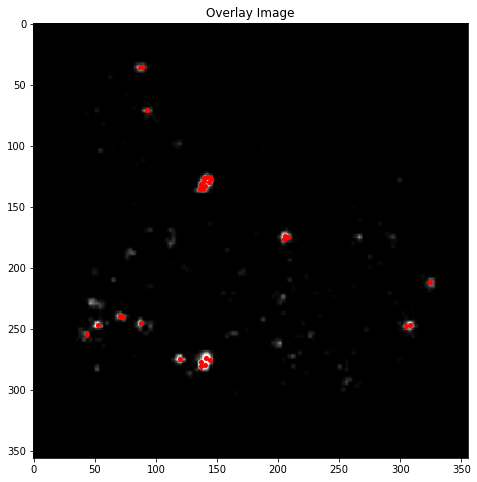

In [10]:
if os.path.exists("testing.hdf5"):
    os.remove("testing.hdf5")
    
mfit.analyze("rawR5.tiff", "testing.hdf5", "testing.xml")
overlay_image.overlayImage("rawR5.tiff", "testing.hdf5", 0)

### Using Visualizer

An alternative way to visualize the results is to use the visualizer program. This will only work if you are running jupyter locally.

In [15]:
import inspect
import storm_analysis

vis_path = os.path.dirname(inspect.getfile(storm_analysis)) + "/visualizer/"

vis_cmd = vis_path + "/visualizer.py"
vis_dir = os.getcwd()

%run $vis_cmd $vis_dir

print(vis_path)

/Users/ncc-1701-enterprise/Documents/MERFISH_analysis/storm-analysis/storm_analysis/visualizer/


### Analyzing the whole movie

In [ ]:
# This tells 3D-DAOSTORM to analyze the whole movie.
daop.changeAttr("max_frame", -1)
daop.toXMLFile("final.xml")

# Delete any stale results.
if os.path.exists("final.hdf5"):
    os.remove("final.hdf5")
    
# Run the analysis.
mfit.analyze("test.tif", "final.hdf5", "final.xml")


### Creating an image from the analysis

In [ ]:
import matplotlib
import matplotlib.pyplot as pyplot

import storm_analysis.sa_utilities.hdf5_to_image as h5_image

sr_im = h5_image.render2DImage("final.hdf5", scale = 1, sigma = 1)

fig = pyplot.figure(figsize = (8, 8))
ax = fig.add_subplot(1,1,1)
ax.imshow(sr_im)
ax.set_title("SR Image")

pyplot.show()
